In [1]:
import numpy as np
import pandas as pd
import pycaret
import os

In [2]:
os.chdir(r'C:\Users\User\Desktop\data science project\machine learning\one shot for two target')

In [3]:
df=pd.read_csv('placement.csv')

In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [9]:
import sweetviz as sz
report=sz.analyze([df,"MBA placement"])
report.show_html('MBA placement.html')

:FEATURES DONE:                    |                     | [  0%]   00:13  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [6]:
#build dataset for classification aswell as regression
cls=df.drop(['salary'], axis = 1)
cls.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [7]:
reg = df.drop(['status'], axis = 1)
reg.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0


In [8]:
from pycaret.classification import *
model1 = setup(data = cls, target = 'status', session_id=123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"Not Placed: 0, Placed: 1"
3,Original Data,"(215, 14)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [14]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ada Boost Classifier,0.900000,0.936800,0.953600,0.915800,0.930900,0.750100
1,Extreme Gradient Boosting,0.900000,0.950200,0.934500,0.931000,0.927800,0.764700
2,Ridge Classifier,0.886700,0.000000,0.924500,0.920600,0.919200,0.727800
3,Gradient Boosting Classifier,0.886700,0.942500,0.924500,0.920600,0.919300,0.729000
4,Linear Discriminant Analysis,0.886700,0.941000,0.924500,0.920600,0.919200,0.727800
5,Light Gradient Boosting Machine,0.880000,0.947600,0.935500,0.906700,0.915100,0.707100
6,CatBoost Classifier,0.866700,0.947900,0.925500,0.901600,0.907900,0.663800
7,Random Forest Classifier,0.860000,0.929500,0.924500,0.886800,0.900800,0.657500
8,K Neighbors Classifier,0.853300,0.870900,0.943600,0.869200,0.901300,0.617000
9,Extra Trees Classifier,0.846700,0.919100,0.933600,0.866300,0.892100,0.618200


In [15]:
ada=create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9333,0.9800,0.9000,1.0000,0.9474,0.8571
1,0.9333,0.8400,1.0000,0.9091,0.9524,0.8421
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9333,1.0000,1.0000,0.9091,0.9524,0.8421
4,0.9333,1.0000,1.0000,0.9091,0.9524,0.8421
5,0.7333,0.9800,1.0000,0.7143,0.8333,0.2500
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8000,0.8182,0.8182,0.9000,0.8571,0.5263
8,0.8000,0.8864,0.8182,0.9000,0.8571,0.5263
9,0.9333,0.8636,1.0000,0.9167,0.9565,0.8148


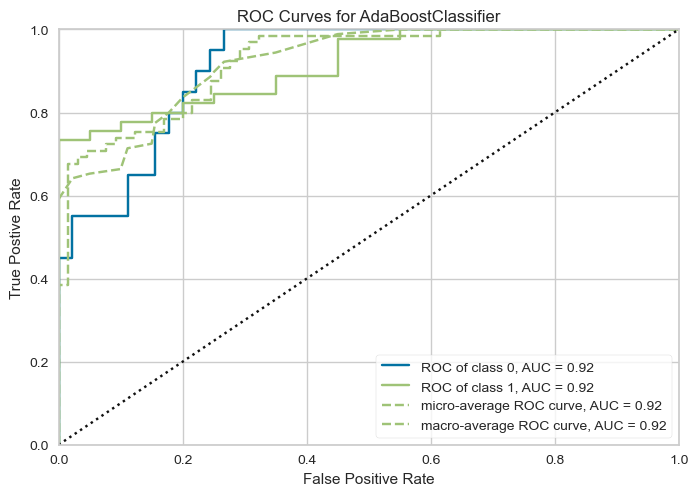

In [17]:
plot_model(ada)

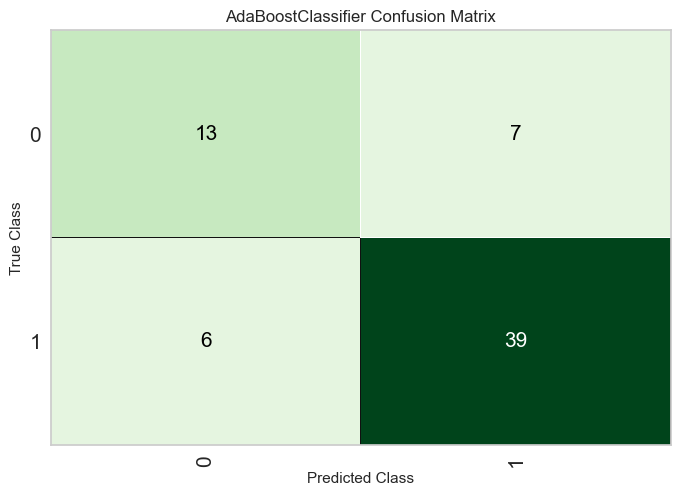

In [18]:
plot_model(ada, plot = 'confusion_matrix')

In [19]:
predict_model(ada)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ada Boost Classifier,0.8,0.9156,0.8667,0.8478,0.8571,0.5239


,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status,Label,Score
0,59.96,42.16,61.26,54.48,65.48,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0,0.3143
1,76.50,97.70,78.86,97.40,74.01,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,0.5736
2,61.08,50.00,54.00,71.00,65.69,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0.2066
3,63.00,67.00,74.00,82.00,60.44,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0.5590
4,49.00,39.00,65.00,63.00,51.21,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0.2455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,58.00,61.00,60.00,62.00,60.85,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1,0,0.4553
61,62.00,58.00,53.00,89.00,60.22,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0,0.3214
62,74.00,62.00,68.00,74.00,57.99,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,1,0.5871
63,54.00,77.60,69.20,95.65,66.94,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0.5501


In [23]:
# save a model
save_model(ada, 'ada-cls-placemnt')
 

NameError: name 'ada' is not defined

In [13]:
####regression###

from pycaret.regression import *
model2= setup(data=reg,
              target = 'salary',
              feature_selection = True,
              remove_outliers = True,
              ignore_features = ['ssc_b','hsc_b'],
              session_id=123)


 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(215, 14)"
4,Missing Values,True
5,Numeric Features,6
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [14]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,47502.066300,4322247476.311200,63523.633100,-0.218900,0.202800,0.157500
1,Random Sample Consensus,48540.767700,4468512542.865800,64626.577400,-0.233500,0.207400,0.160300
2,Elastic Net,48548.397400,4415737949.454600,64144.939200,-0.255900,0.206100,0.163800
3,Support Vector Machine,49984.107000,4862340145.145600,67032.214200,-0.279800,0.211500,0.159900
4,TheilSen Regressor,48626.318000,4523262801.361500,65154.573800,-0.282200,0.209300,0.162700
5,Bayesian Ridge,49189.964500,4445514462.985900,64153.399500,-0.291500,0.205700,0.166200
6,Ridge Regression,49875.210800,4545519865.151200,65744.169900,-0.370200,0.212400,0.168700
7,Random Forest,49390.711100,4343162344.666700,64002.337400,-0.386900,0.204100,0.166600
8,Lasso Least Angle Regression,49982.843900,4577546933.323900,66027.359600,-0.389800,0.213600,0.169000
9,Lasso Regression,49991.988300,4579076141.062700,66037.890600,-0.390200,0.213600,0.169100


In [15]:
svm = create_model('svm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,60799.6104,7.867953e+09,88701.4848,-0.0391,0.2656,0.1888
1,49499.9252,4.905620e+09,70040.1344,-0.0045,0.2303,0.1688
2,44899.6113,3.209477e+09,56652.2452,-0.0855,0.1927,0.1521
3,66699.8676,8.476955e+09,92070.3784,-0.3084,0.2649,0.1809
4,51499.7329,4.772457e+09,69082.9742,-0.3074,0.2100,0.1487
5,51999.7034,6.440005e+09,80249.6446,-0.0982,0.2322,0.1542
6,34498.8801,1.522422e+09,39018.2271,-1.5706,0.1541,0.1461
7,65777.6710,5.575096e+09,74666.5687,-0.0601,0.2488,0.2222
8,51666.3067,5.008272e+09,70769.1474,-0.0719,0.2173,0.1614
9,22499.7615,8.451426e+08,29071.3369,-0.2526,0.0988,0.0751


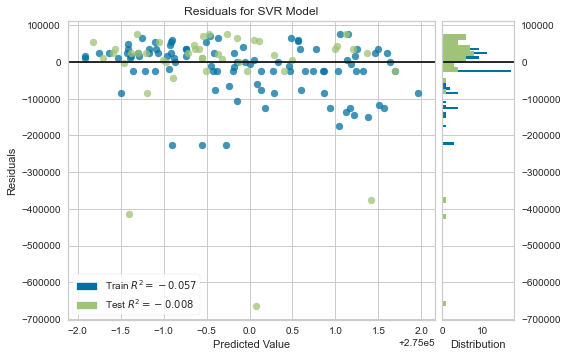

In [16]:
plot_model(svm)

In [17]:
evaluate_model(svm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
tunedsvm=tune_model('svm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,60796.5048,7.867546e+09,88699.1875,-0.0390,0.2656,0.1888
1,49499.3052,4.904961e+09,70035.4267,-0.0044,0.2303,0.1688
2,44896.4657,3.209298e+09,56650.6621,-0.0854,0.1927,0.1521
3,66698.7699,8.477407e+09,92072.8362,-0.3085,0.2649,0.1809
4,51497.5192,4.772104e+09,69080.4153,-0.3073,0.2100,0.1487
5,51997.2449,6.440051e+09,80249.9266,-0.0982,0.2322,0.1542
6,34489.5976,1.521776e+09,39009.9475,-1.5695,0.1541,0.1461
7,65776.7856,5.574975e+09,74665.7564,-0.0601,0.2488,0.2222
8,51663.2166,5.007754e+09,70765.4826,-0.0718,0.2172,0.1614
9,22497.7846,8.451737e+08,29071.8706,-0.2527,0.0988,0.0751


In [21]:
# generate predictions on holdout
predictions_holdout = predict_model(tunedsvm)
 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Support Vector Regressor,66416.1551,1.922234e+10,138644.6623,-0.0077,0.3137,0.183


In [22]:
# save a model
save_model(tunedsvm, 'svm-reg-placement')
 

Transformation Pipeline and Model Succesfully Saved
